In [102]:
def calculate_distance(p, q):
    """ Calculate Euclidean distance between two points."""
    # Assume points are tuples of ([x,y],label)
    return ((p[0]-q[0])**2 + (p[1]-q[1])**2) ** 0.5

In [103]:
import collections
labels = ['a','b','c','c']
print(collections.Counter(labels))

def neighbor_vote(labels):
    """ Get the majority label from k neighbors."""
    # Is it possible to have a tie? How would you handle that?
    #print(labels)
    vote = collections.Counter(labels).most_common(1)[0][0]
    return vote

Counter({'c': 2, 'a': 1, 'b': 1})


In [104]:
def knn_classifier(labeled_points, new_point, k):
    """ Given classified points and one new point, return a prediction based on the votes of k neighbors."""
    if k % 2 == 0:
        return "Must use odd k, to prevent ties"
    label_distances = []

    for p in labeled_points:
        #print(p[0], new_point)
        distance = calculate_distance(p[0],new_point)
        label_distances.append((distance,p[1]))
    
    label_distances.sort() # Put them in order
    #print(label_distances)
    prediction = neighbor_vote([label[1] for label in label_distances[:k]])
    return prediction

In [105]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

# import data
iris = datasets.load_iris()
X = iris.data[:100, :2]  # use the first two features and just the first two classes.
y = iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Split 70/30 into initial data and new points to classify
training_df = pd.DataFrame({'feature1':X_train[:,0],'feature2':X_train[:,1],'class':y_train})
test_df = pd.DataFrame({'feature1':X_test[:,0],'feature2':X_test[:,1],'class':y_test})

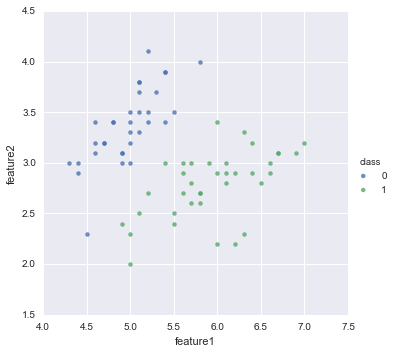

In [106]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

#plt.plot(training_df.feature1, training_df.feature2, hue = training_df['class'])
sns.lmplot('feature1', 'feature2', 
           data=training_df, 
           fit_reg=False, 
           hue="class")

In [108]:
""" Iteratively classify new points in test_df, based on the labeled points in training_df, and track your accuracy."""

#print(training_df[:5])

training = training_df.T.values.tolist()
labeled_points = zip(zip(training[1],training[2]),training[0])

#print(labeled_points[:5])

knn_classifier(labeled_points, ((6.0,2.5)),k=5)


1.0

In [ ]:
""" BONUS: plot the labeled points and an example of a new point being classified."""